<a href="https://colab.research.google.com/github/vinodmp4/DIY_Ramachandran_Plot/blob/main/diy_ramachandran_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Info

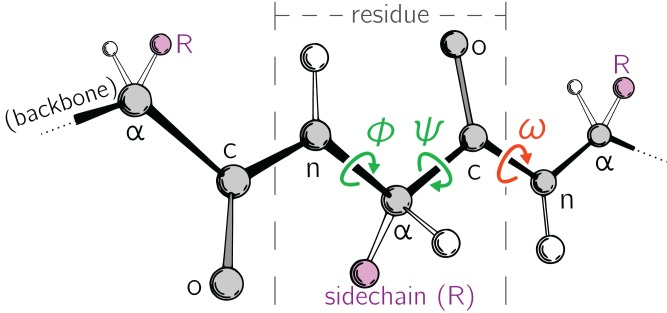

# Imports

In [ ]:
!pip install biopython
import Bio.PDB
import math
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Draw Graph Grid

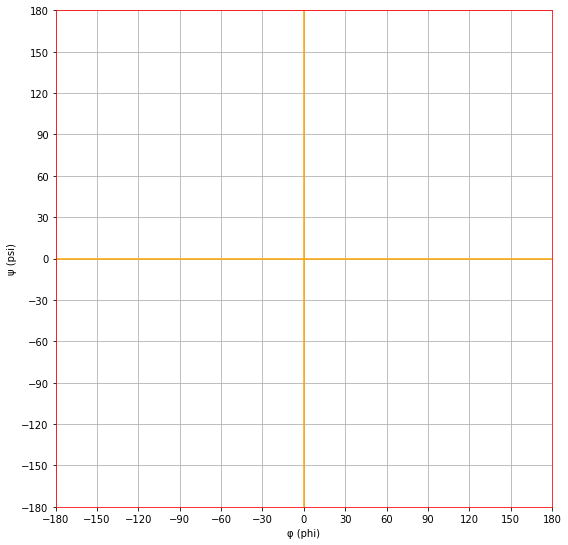

In [ ]:
def getlabel(singlecode):
    names = {'A':'Alanine','R':'Arginine','N':'Asparagine','D':'Aspartic acid','C':'Cysteine',
             'Q':'Glutamine','E':'Glutamic acid','G':'Glycine','H':'Histidine','I':'Isoleucine',
             'L':'Leucine','K':'Lysine','M':'Methionine','F':'Phenylalanine','P':'Proline','S':'Serine',
             'T':'Threonine','W':'Tryptophan','Y':'Tyrosine','V':'Valine','X':'Others'}
    output = [names[i] for i in singlecode]
    return output

def drawplot(data = [],legends=[]):
    plt.rcParams["figure.figsize"] = [8, 8]
    plt.rcParams["figure.autolayout"] = True
    fig, axes = plt.subplots(1, 1)
    plt.xlim([-180, 180]); plt.xlabel("φ (phi)") #dihedral angle between N(i-1)-C(i)-CA(i)-N(i)
    plt.ylim([-180, 180]); plt.ylabel("ψ (psi)") #dihedral angle between C(i)-CA(i)-N(i)-C(i+1)
    plt.setp(plt.gca().spines.values(), color='red')
    axes.set_aspect('equal', adjustable='box')
    grid_points = [i for i in range(-180,181,30)]
    axes.xaxis.set_ticks(grid_points);axes.yaxis.set_ticks(grid_points)
    if not(data == []):
        for index, i in enumerate(data):
            if not(len(legends)>0):plt.scatter(i[0],i[1])
            else:
                plt.scatter(i[0],i[1],label=legends[index])
                plt.legend(legends,bbox_to_anchor=(1.1, 1.05))
    plt.axvline(x=0, c="orange");plt.axhline(y=0, c="orange")
    plt.grid();fig.show()
drawplot()

# Load PDB

In [ ]:
!wget https://files.rcsb.org/download/1HMP.pdb

In [ ]:
polylist = {}
for model in Bio.PDB.PDBParser().get_structure("1HMP", "1HMP.pdb") :
    for chain in model :
        poly = Bio.PDB.Polypeptide.Polypeptide(chain)
        seq = poly.get_sequence()
        for item, res in zip(poly.get_phi_psi_list(),seq):
            if not(res in polylist.keys()):polylist[res] = []
            if not(None in item):
                polylist[res].append(item)

# Plot Graph

In [ ]:
data = [[[],[]]]; chain = list(polylist.keys());chain.sort()
for residue in chain:
    data[0][0].extend([i[0]*180/math.pi for i in polylist[residue]])
    data[0][1].extend([i[1]*180/math.pi for i in polylist[residue]])
drawplot(data)

# Plot with Colours

In [ ]:
data = []; chain = list(polylist.keys());chain.sort()
for residue in chain:
    data.append([[i[0]*180/math.pi for i in polylist[residue]],[i[1]*180/math.pi for i in polylist[residue]]])
drawplot(data)

# Plot Graph With Label

In [ ]:
data = []; chain = list(polylist.keys());chain.sort()
for residue in chain:
    data.append([[i[0]*180/math.pi for i in polylist[residue]],[i[1]*180/math.pi for i in polylist[residue]]])
drawplot(data,getlabel(chain))